In [31]:
import matplotlib.pyplot as plt
from pathlib import Path
import nibabel as nib
import open3d as o3d
import numpy as np 
import ants
import os


In [32]:
dir_workspace = Path("/media/maichi/T7/workspace")
dir_workspace.exists()


True

In [33]:
def get_patient_data(patient, list_organs=["rib_right_12"]):

    # Load the CT : 
    path_ct = dir_workspace / patient / 'temp' / 'CT.nii.gz'
    ct = nib.load(str(path_ct)).get_fdata()

    # Load the segmentations : 

    seg = np.zeros(ct.shape)
    
    for organ in list_organs:
        path_organ = dir_workspace / patient / 'NIFTI_FROM_CT' / fr'{organ}.nii.gz'
        organ = nib.load(str(path_organ)).get_fdata()

        seg = seg + organ

    return ct, seg
        

In [34]:
def get_selected_slice(ct, seg, slice_number, axis=0):

    if axis == 0:     # Axis
        selected_ct = ct[:, :, slice_number]
        selected_seg = seg[:, :, slice_number]
    elif axis == 1:   # Coronal
        selected_ct = ct[:, slice_number, :]
        selected_seg = seg[:, slice_number, :]
    elif axis == 2:   # Sagittal
        selected_ct = ct[slice_number, :, :]
        selected_seg = seg[slice_number, :, :]

    return selected_ct, selected_seg
        

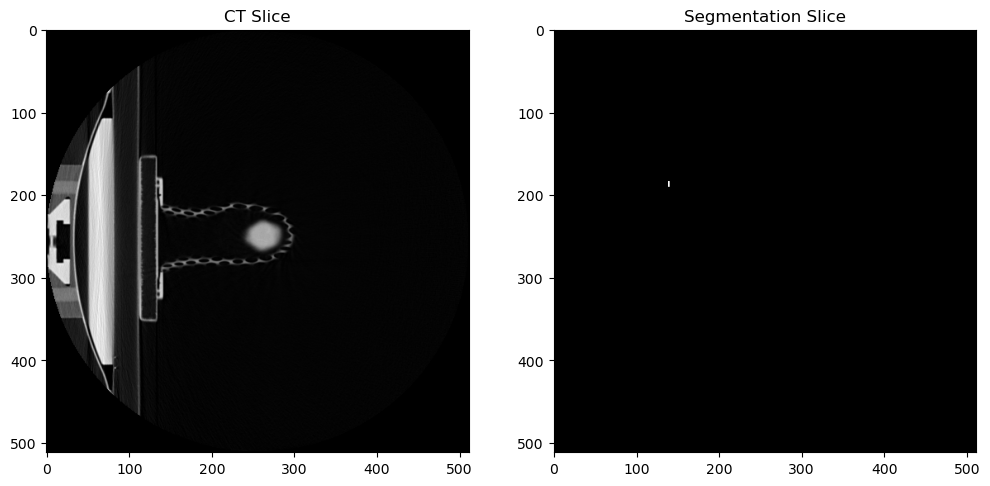

In [43]:
ct, seg = get_patient_data('AGORL_P1', list_organs=['rib_right_12'])

ct_slice, seg_slice = get_selected_slice(ct, seg, 264, axis=0)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Display the CT slice
axs[0].imshow(ct_slice, cmap='gray')
axs[0].set_title('CT Slice')

# Display the segmentation slice
axs[1].imshow(seg_slice, cmap='gray')
axs[1].set_title('Segmentation Slice')

plt.show()


In [36]:
ct, seg = get_patient_data('AGORL_P1', list_organs=['rib_right_12'])

for i in range(271):
    _, seg_slice = get_selected_slice(ct, seg, i, axis=0)

    print(fr"slice {i:3} = {seg_slice.sum()}")
        

slice   0 = 0.0
slice   1 = 0.0
slice   2 = 0.0
slice   3 = 0.0
slice   4 = 0.0
slice   5 = 0.0
slice   6 = 0.0
slice   7 = 0.0
slice   8 = 0.0
slice   9 = 0.0
slice  10 = 0.0
slice  11 = 0.0
slice  12 = 0.0
slice  13 = 0.0
slice  14 = 0.0
slice  15 = 0.0
slice  16 = 0.0
slice  17 = 0.0
slice  18 = 0.0
slice  19 = 0.0
slice  20 = 0.0
slice  21 = 0.0
slice  22 = 0.0
slice  23 = 0.0
slice  24 = 0.0
slice  25 = 0.0
slice  26 = 0.0
slice  27 = 0.0
slice  28 = 0.0
slice  29 = 0.0
slice  30 = 0.0
slice  31 = 0.0
slice  32 = 0.0
slice  33 = 0.0
slice  34 = 0.0
slice  35 = 0.0
slice  36 = 0.0
slice  37 = 0.0
slice  38 = 0.0
slice  39 = 0.0
slice  40 = 0.0
slice  41 = 0.0
slice  42 = 0.0
slice  43 = 0.0
slice  44 = 0.0
slice  45 = 0.0
slice  46 = 0.0
slice  47 = 0.0
slice  48 = 0.0
slice  49 = 0.0
slice  50 = 0.0
slice  51 = 0.0
slice  52 = 0.0
slice  53 = 0.0
slice  54 = 0.0
slice  55 = 0.0
slice  56 = 0.0
slice  57 = 0.0
slice  58 = 0.0
slice  59 = 0.0
slice  60 = 0.0
slice  61 = 0.0
slice  6

In [ ]:
def segment_body_from_ct(ct, slice_):    
    
    # Assuming the CT image is 3D, select a slice for demonstration
    slice_index = ct_data.shape[2] // 2  # Middle slice
    ct_slice = ct_data[:, :, slice_index]
    
    # Apply thresholding to separate the body from the background and the table
    threshold_value = filters.threshold_otsu(ct_slice)
    binary_image = ct_slice > threshold_value
    
    # Apply morphological operations to clean up the segmentation
    cleaned_image = morphology.binary_opening(binary_image, morphology.disk(3))
    
    # Label connected components
    labeled_image, _ = measure.label(cleaned_image, return_num=True, connectivity=2)
    
    # Select the largest component (assuming it's the body)
    regions = measure.regionprops(labeled_image)
    largest_region = max(regions, key=lambda x: x.area)
    body_segmentation = labeled_image == largest_region.label
    
    # Plotting the original slice and the segmented body
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))
    ax[0].imshow(ct_slice, cmap='gray')
    ax[0].set_title('Original CT Slice')
    ax[1].imshow(body_segmentation, cmap='gray')
    ax[1].set_title('Segmented Body')
    for a in ax:
        a.axis('off')
    plt.show()

# Example usage
ct_image_path = 'path/to/your/ct_image.nii.gz'
segment_body_from_ct(ct_image_path)